**Sara Rizvi**

**RIN: 662088215**

**Project Progress 3: Exploratory Data Analysis**

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Old Features

In [2]:
# # Import data
# from google.colab import drive
# drive.mount('/content/drive')

# # South Data (azimuth = 180)
# file_path1 = '/content/drive/MyDrive/Machine Learning/Project/MPP_data_ALB_south.xlsx'
# df_south = pd.read_excel(file_path1)
# # Drop first column
# df_south = df_south.drop(df_south.columns[0], axis=1)

# # East Data (azimuth = 90)
# file_path2 = '/content/drive/MyDrive/Machine Learning/Project/MPP_data_ALB_East.xlsx'
# df_east = pd.read_excel(file_path2)
# # Drop first column
# df_east = df_east.drop(df_east.columns[0], axis=1)
# df_east = df_east.drop(df_east.columns[6], axis=1)


# # West Data (azimuth = 270)
# file_path3 = '/content/drive/MyDrive/Machine Learning/Project/MPP_data_ALB_West.xlsx'
# df_west = pd.read_excel(file_path3)
# # Drop first column
# df_west = df_west.drop(df_west.columns[0], axis=1)



# Option 2: Downloaded Files
# South
df_south = pd.read_excel('MPP_data_ALB_south.xlsx')
# Drop first column
df_south = df_south.drop(df_south.columns[0], axis=1)
df_south = df_south.drop(df_south.columns[1], axis=1)

# East
df_east = pd.read_excel('MPP_data_ALB_East.xlsx')
# Drop first column
df_east = df_east.drop(df_east.columns[0], axis=1)
df_east = df_east.drop(df_east.columns[1], axis=1)

df_east = df_east.drop('Date', axis=1)


# West
df_west= pd.read_excel('MPP_data_ALB_West.xlsx')
# Drop first column
df_west = df_west.drop(df_west.columns[0], axis=1)
df_west = df_west.drop(df_west.columns[1], axis=1)

df_west = df_west.drop('Date', axis=1)

df_south.head()
df_east.head()
df_west.head()

,Energy,poa_direct,Wind Speed,Temperature,Azimuth,Hour
0,0.0,0.0,0.5,-1.1,270,0
1,0.0,0.0,0.5,-1.1,270,1
2,0.0,0.0,0.5,-1.0,270,2
3,0.0,0.0,0.5,-1.0,270,3
4,0.0,0.0,0.6,-1.3,270,4


# Question 1.1: Description

In [3]:
# Column names (include wind speed?)
df_east.columns

Index(['Energy', 'poa_direct', 'Wind Speed', 'Temperature', 'Azimuth', 'Hour'], dtype='object')

In [4]:
# Shape of dataframes
print('South data shape:',df_south.shape)
print('East data shape:',df_east.shape)
print('West data shape:',df_west.shape)

South data shape: (8760, 7)
East data shape: (8760, 6)
West data shape: (8760, 6)


In [5]:
# Split data into features and targets
# South data
X_south = df_south[['poa_direct', 'Temperature', 'Wind Speed']]
y_south = df_south[['Energy']]

# East data
X_east = df_east[['poa_direct', 'Temperature', 'Wind Speed']]
y_east = df_east[['Energy']]

# West data
X_west = df_west[['poa_direct', 'Temperature', 'Wind Speed']]
y_west = df_west[['Energy']]

print(X_south.head())
print(y_south.head())

   poa_direct  Temperature  Wind Speed
0         0.0         -1.1         0.5
1         0.0         -1.1         0.5
2         0.0         -1.0         0.5
3         0.0         -1.0         0.5
4         0.0         -1.3         0.6
   Energy
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0


8760 points in each dataset with 5 columns

Original Features: POA(direct), Temperature, Weather

Target: Energy at MPP (max power point: most power produced at that instance)

# Question 1.2: Summary Statistics

In [6]:
# South data summary statistics
print('South data summary statistics:')
print(df_south.describe())

South data summary statistics:
                             Date       Energy   poa_direct   Wind Speed  \
count                        8760  8760.000000  8760.000000  8760.000000   
mean          2022-07-02 11:30:00    20.089559    67.235581     0.252797   
min           2022-01-01 00:00:00     0.000000     0.000000     0.000000   
25%    2022-04-02 05:44:59.928000     0.000000     0.000000     0.000000   
50%    2022-07-02 11:29:59.856000     0.000000     0.000000     0.000000   
75%    2022-10-01 17:14:59.784000     6.767227    24.469182     0.400000   
max    2022-12-31 22:59:59.712000   262.021195   829.072030     2.400000   
std                           NaN    45.999963   152.051318     0.364824   

       Temperature  Azimuth         Hour  
count  8760.000000   8760.0  8760.000000  
mean      9.295776    180.0    11.500000  
min     -26.300000    180.0     0.000000  
25%       0.600000    180.0     5.750000  
50%       9.600000    180.0    11.500000  
75%      18.800000    180.

In [7]:
print("Number of zero values in poa_direct:", (df_south['poa_direct'] == 0).sum())
print("Number of zero values in Wind Speed:", (df_south['Wind Speed'] == 0).sum())

Number of zero values in poa_direct: 5378
Number of zero values in Wind Speed: 4429


In [8]:
# For 'poa_direct'
poa_direct_nonzero_freq = df_south[df_south['poa_direct'] != 0].groupby('poa_direct').size()
print(poa_direct_nonzero_freq)

# For 'Wind Speed'
wind_speed_nonzero_freq = df_south[df_south['Wind Speed'] != 0].groupby('Wind Speed').size()
print(wind_speed_nonzero_freq)

poa_direct
0.000982      1
0.001203      1
0.002688      1
0.002852      1
0.003915      1
             ..
821.735618    1
821.865959    1
826.547105    1
827.383013    1
829.072030    1
Length: 3382, dtype: int64
Wind Speed
0.1    636
0.2    548
0.3    580
0.4    474
0.5    470
0.6    391
0.7    327
0.8    223
0.9    184
1.0    141
1.1     89
1.2     65
1.3     59
1.4     38
1.5     26
1.6     23
1.7      9
1.8     13
1.9      8
2.0      8
2.1      4
2.2      6
2.3      5
2.4      4
dtype: int64


In [9]:
# East data summary statistics
print('East data summary statistics:')
print(df_east.describe())

East data summary statistics:
            Energy   poa_direct   Wind Speed  Temperature  Azimuth  \
count  8760.000000  8760.000000  8760.000000  8760.000000   8760.0   
mean     13.405254    45.290998     0.252797     9.295776     90.0   
std      38.657840   130.237401     0.364824    11.294783      0.0   
min       0.000000     0.000000     0.000000   -26.300000     90.0   
25%       0.000000     0.000000     0.000000     0.600000     90.0   
50%       0.000000     0.000000     0.000000     9.600000     90.0   
75%       0.000000     0.000000     0.400000    18.800000     90.0   
max     238.387717   724.511633     2.400000    34.300000     90.0   

              Hour  
count  8760.000000  
mean     11.500000  
std       6.922582  
min       0.000000  
25%       5.750000  
50%      11.500000  
75%      17.250000  
max      23.000000  


In [10]:
# West data summary statistics
print('West data summary statistics:')
print(df_west.describe())

West data summary statistics:
            Energy   poa_direct   Wind Speed  Temperature  Azimuth  \
count  8760.000000  8760.000000  8760.000000  8760.000000   8760.0   
mean     12.084019    41.344438     0.252797     9.295776    270.0   
std      35.528903   121.256871     0.364824    11.294783      0.0   
min       0.000000     0.000000     0.000000   -26.300000    270.0   
25%       0.000000     0.000000     0.000000     0.600000    270.0   
50%       0.000000     0.000000     0.000000     9.600000    270.0   
75%       0.000000     0.000000     0.400000    18.800000    270.0   
max     231.847672   719.310203     2.400000    34.300000    270.0   

              Hour  
count  8760.000000  
mean     11.500000  
std       6.922582  
min       0.000000  
25%       5.750000  
50%      11.500000  
75%      17.250000  
max      23.000000  


# Question 1.3: Visualizations

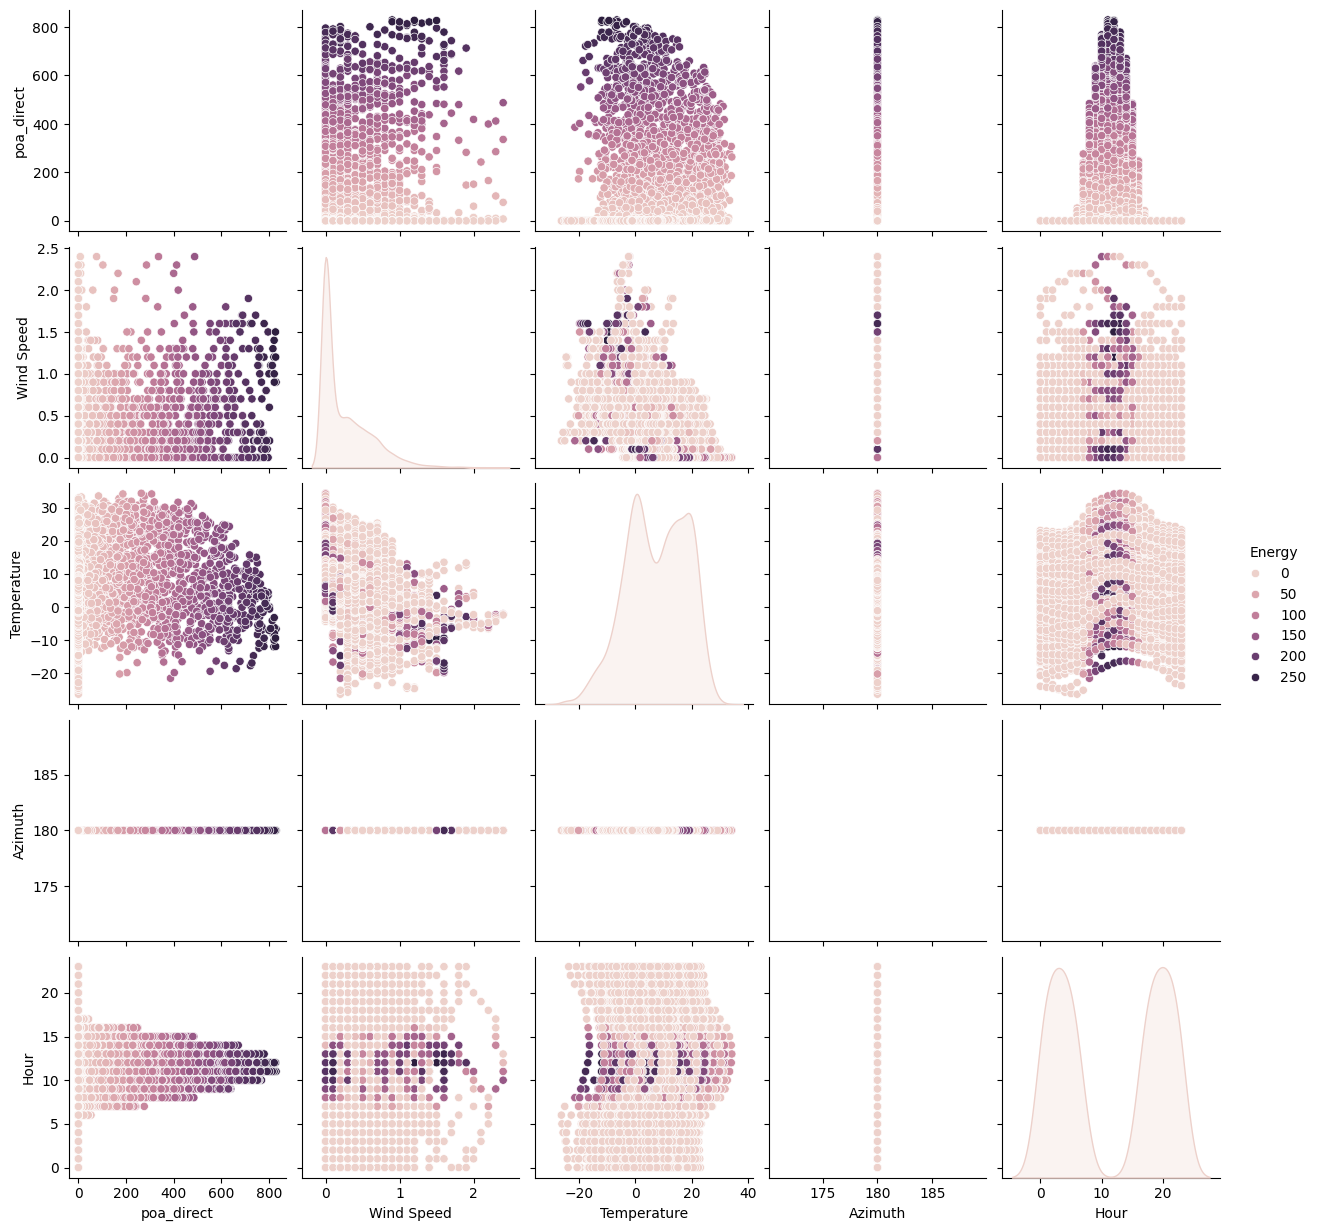

In [11]:
# Create pair plot
# SOUTH
sns.pairplot(df_south, hue='Energy')

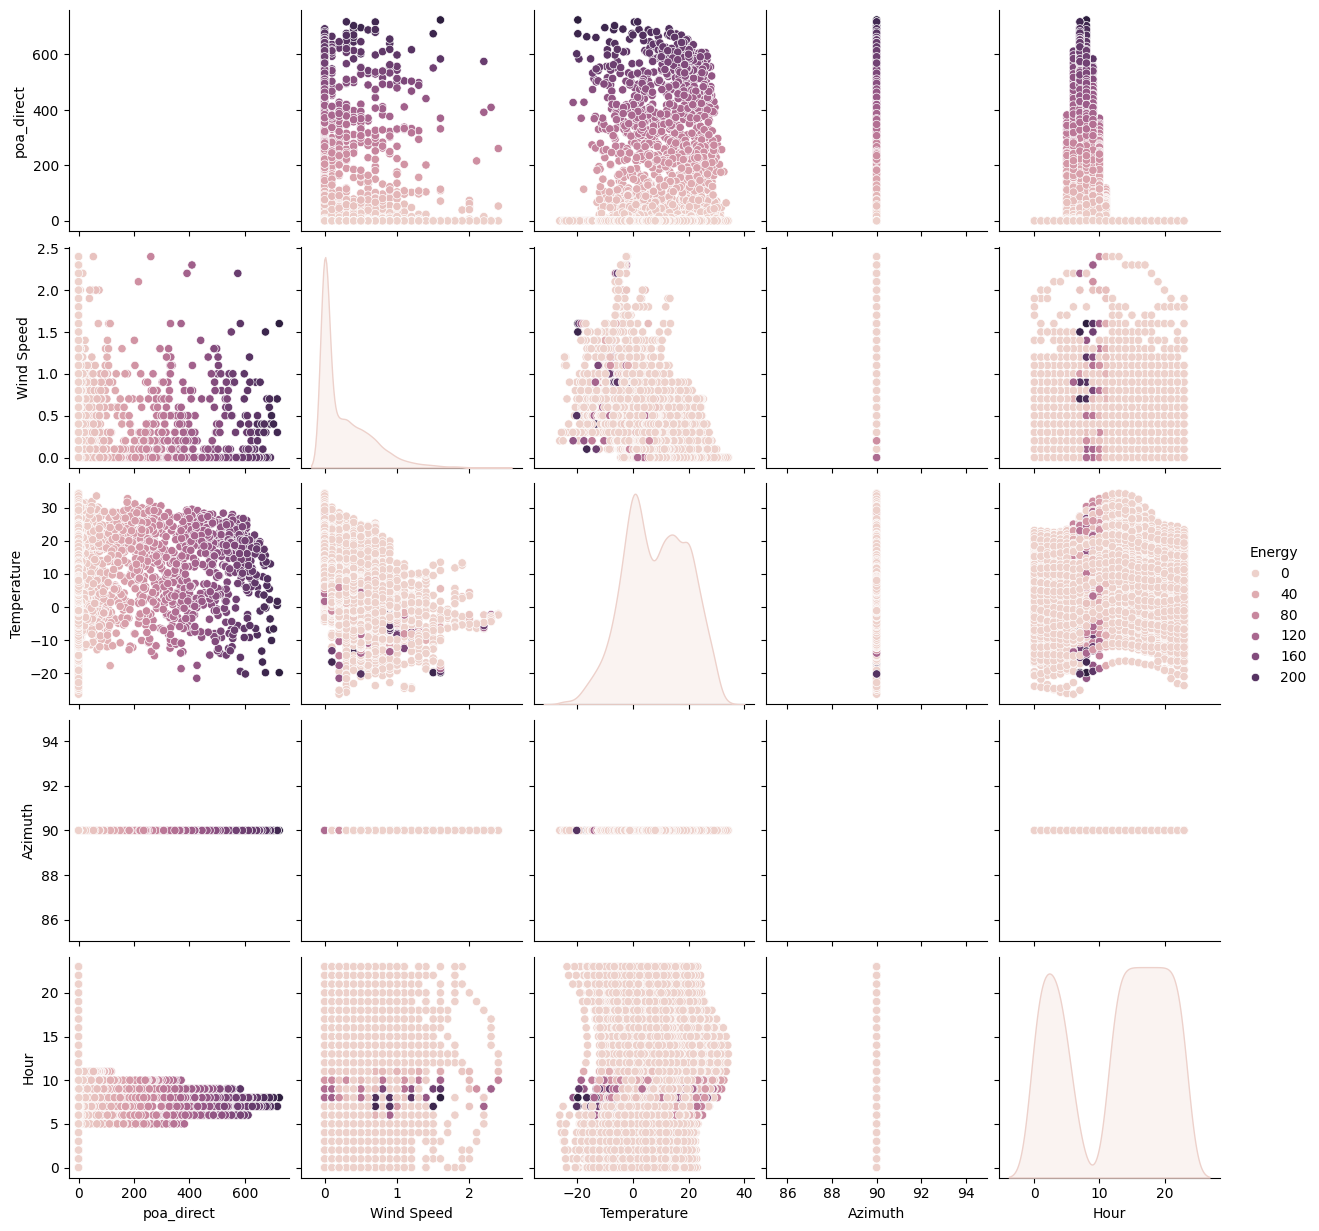

In [12]:
# East
sns.pairplot(df_east, hue='Energy')

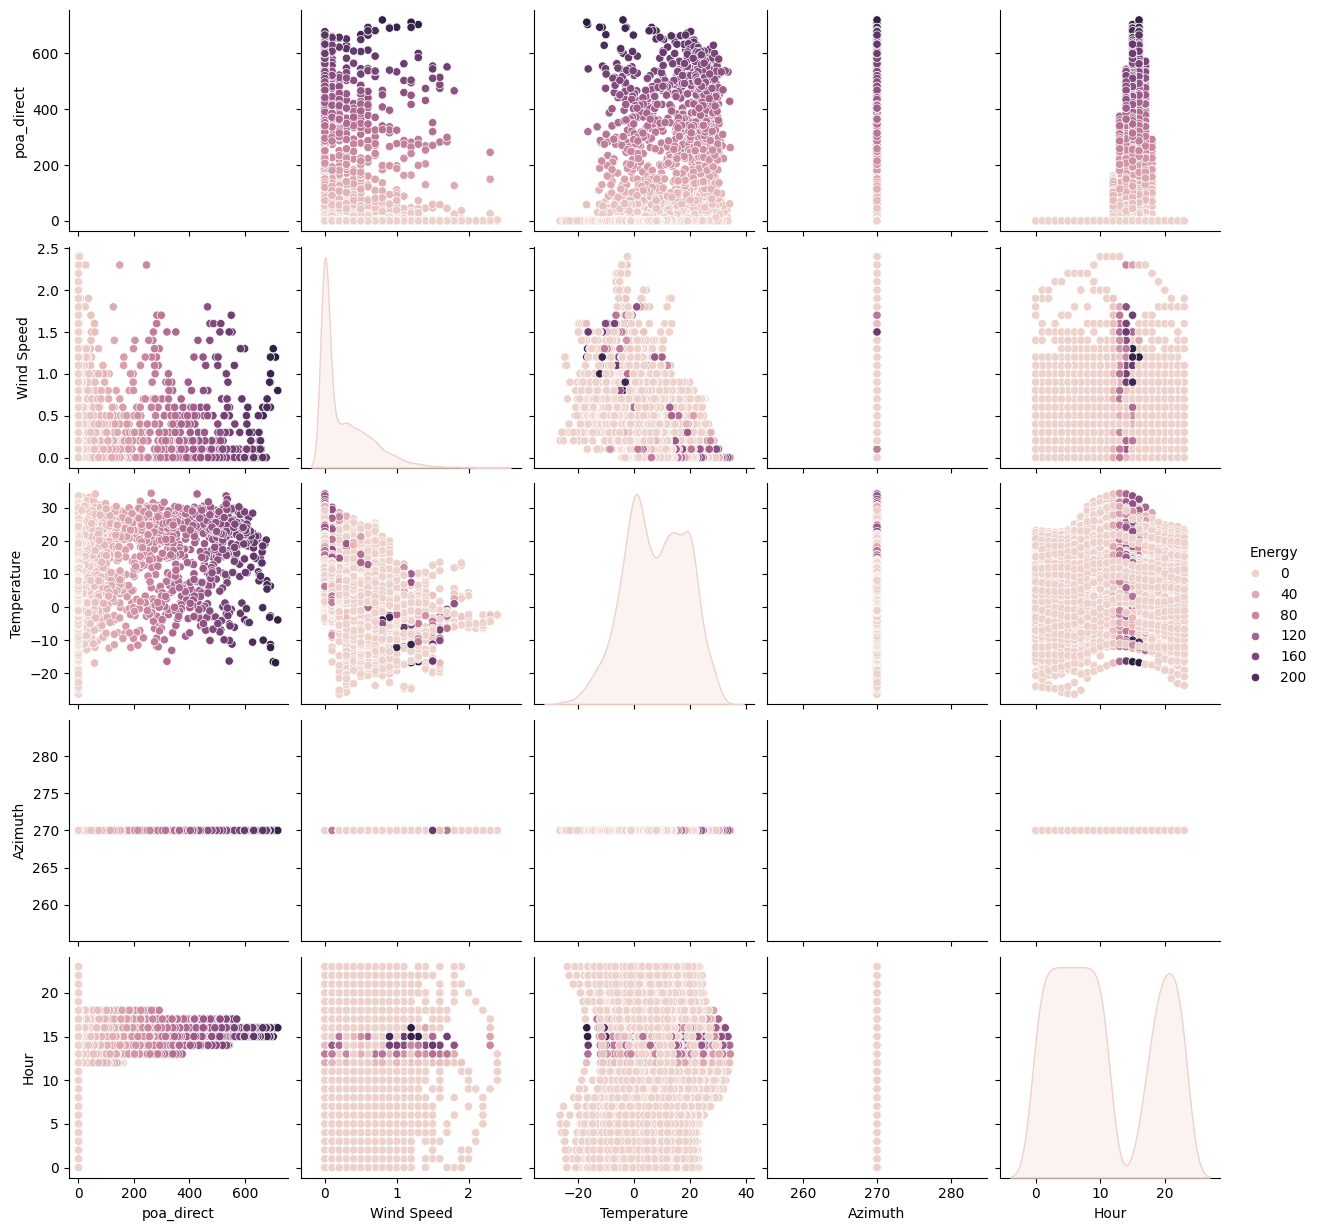

In [13]:
# West
sns.pairplot(df_west, hue='Energy')

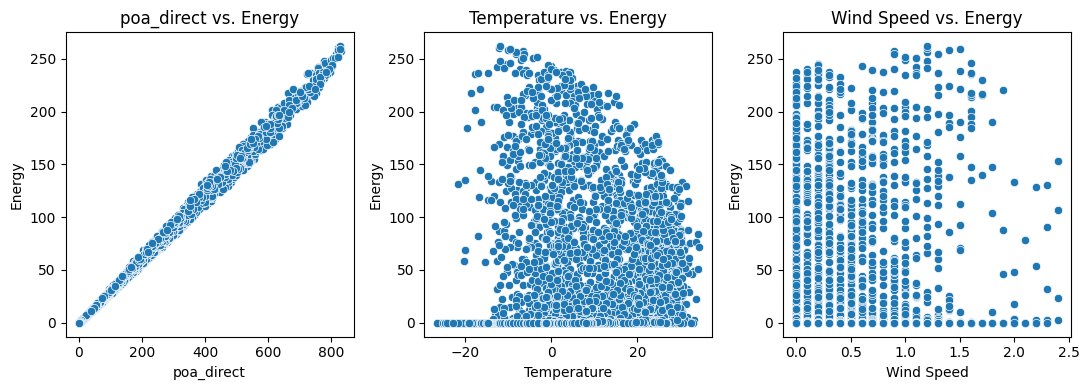

In [14]:
# SOUTH
# Create scatter plot to show relationship between features
# Define features for subplots
features = ['poa_direct', 'Temperature', 'Wind Speed']

# Create subplots
fig, axes = plt.subplots(1, len(features), figsize=(11, 4))  # 1 row, 3 columns

# Iterate through features and create scatter plots
for i, feature in enumerate(features):
    sns.scatterplot(data=df_south, x=feature, y='Energy', ax=axes[i])
    axes[i].set_title(f'{feature} vs. Energy')  # Set subplot title

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


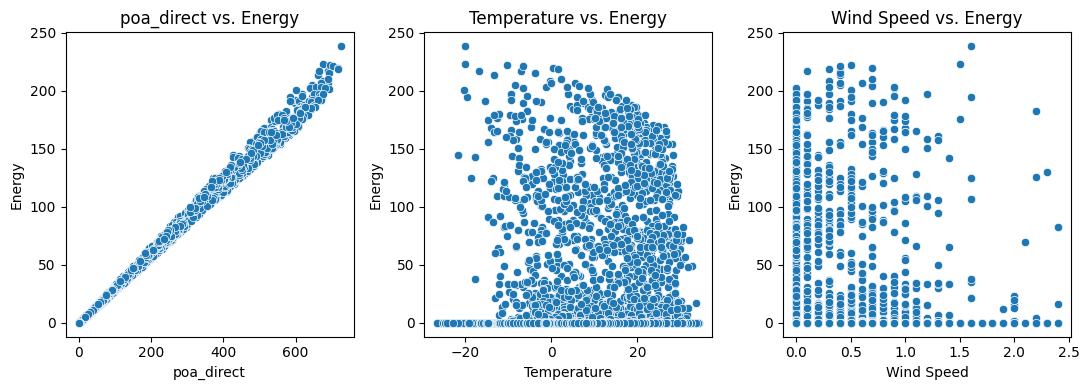

In [15]:
# East
# Create scatter plot to show relationship between features
# Define features for subplots
features = ['poa_direct', 'Temperature', 'Wind Speed']

# Create subplots
fig, axes = plt.subplots(1, len(features), figsize=(11, 4))  # 1 row, 3 columns

# Iterate through features and create scatter plots
for i, feature in enumerate(features):
    sns.scatterplot(data=df_east, x=feature, y='Energy', ax=axes[i])
    axes[i].set_title(f'{feature} vs. Energy')  # Set subplot title

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


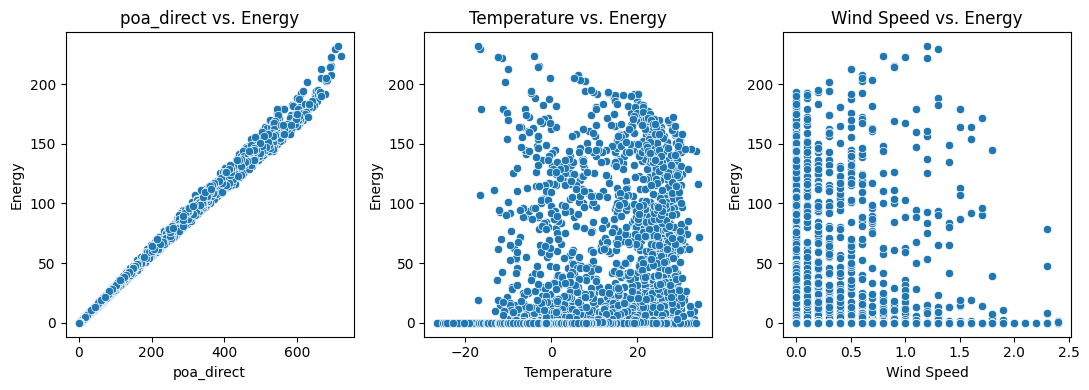

In [16]:
# West
# Create scatter plot to show relationship between features
# Define features for subplots
features = ['poa_direct', 'Temperature', 'Wind Speed']

# Create subplots
fig, axes = plt.subplots(1, len(features), figsize=(11, 4))  # 1 row, 3 columns

# Iterate through features and create scatter plots
for i, feature in enumerate(features):
    sns.scatterplot(data=df_west, x=feature, y='Energy', ax=axes[i])
    axes[i].set_title(f'{feature} vs. Energy')  # Set subplot title

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


Column 'Time' not found in DataFrame. Skipping drop operation.


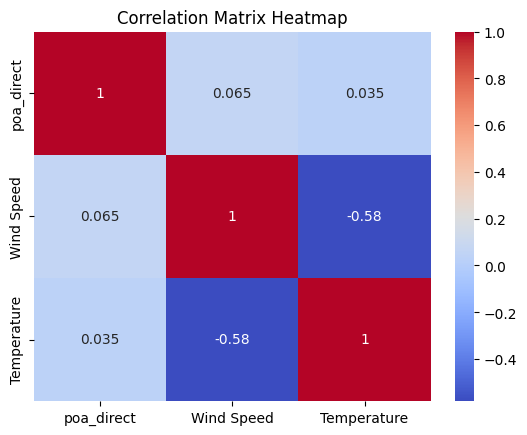

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert datetime object
columns_to_drop = ['Date', 'Energy', 'Time', 'Azimuth', 'Hour']
for column in columns_to_drop:
    if column in df_south.columns:
        df_south = df_south.drop(column, axis=1)
    else:
        print(f"Column '{column}' not found in DataFrame. Skipping drop operation.")

# Heatmap
corr_matrix = df_south.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

Column 'Date' not found in DataFrame. Skipping drop operation.
Column 'Time' not found in DataFrame. Skipping drop operation.


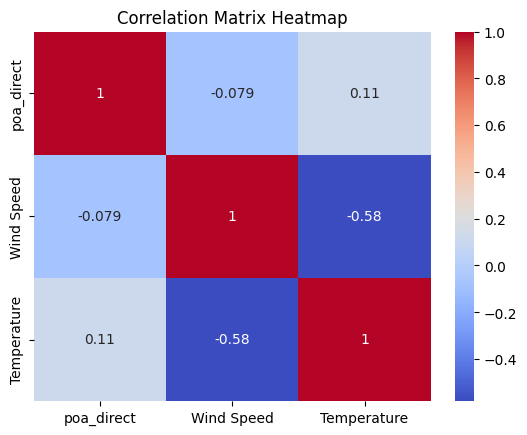

In [18]:
# East
# Drop specified columns
columns_to_drop = ['Date', 'Energy', 'Time', 'Azimuth', 'Hour']
for column in columns_to_drop:
    if column in df_east.columns:
        df_east = df_east.drop(column, axis=1)  # Update df_east in place
    else:
        print(f"Column '{column}' not found in DataFrame. Skipping drop operation.")
# Heatmap
corr_matrix = df_east.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

Column 'Time' not found in DataFrame. Skipping drop operation.
Column 'Date' not found in DataFrame. Skipping drop operation.


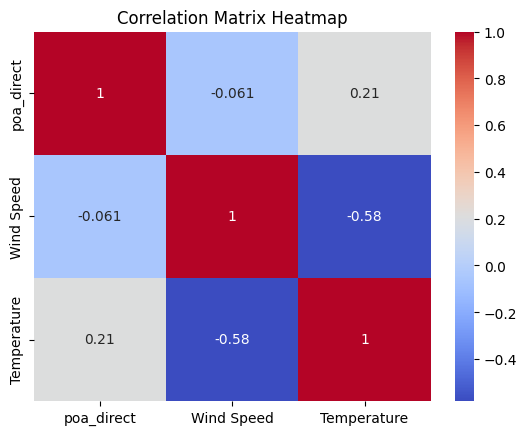

In [19]:
# West
# Drop specified columns
columns_to_drop = ['Time', 'Date', 'Energy', 'Azimuth', 'Hour']
for column in columns_to_drop:
    if column in df_west.columns:
        df_west = df_west.drop(column, axis=1)  # Update df_west in place
    else:
        print(f"Column '{column}' not found in DataFrame. Skipping drop operation.")

# Heatmap
corr_matrix = df_west.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# New Data

In [20]:
# Import data
#from google.colab import drive
#drive.mount('/content/drive')

# Load from saved location
# Option 1: Mount Drive
# South
# import pandas as pd
# X_train_S_new = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2022_Train_Test/X_train_S.xlsx')
# X_test_S_new = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2022_Train_Test/X_test_S.xlsx')
# y_train_S_new = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2022_Train_Test/y_train_S.xlsx')
# y_test_S_new = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2022_Train_Test/y_test_S.xlsx')

# # East
# X_train_E_new = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2022_Train_Test/X_train_E.xlsx')
# X_test_E_new = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2022_Train_Test/X_test_E.xlsx')
# y_train_E_new = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2022_Train_Test/y_train_E.xlsx')
# y_test_E_new = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2022_Train_Test/y_test_E.xlsx')

# # West
# X_train_W_new = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2022_Train_Test/X_train_W.xlsx')
# X_test_W_new = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2022_Train_Test/X_test_W.xlsx')
# y_train_W_new = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2022_Train_Test/y_train_W.xlsx')
# y_test_W_new = pd.read_excel('/content/drive/MyDrive/Machine Learning/Project/2022_Train_Test/y_test_W.xlsx')

#  Option 2: Downloaded Files
# South
df_south = pd.read_excel('MPP_data_ALB_south.xlsx')
# Drop first column
df_south = df_south.drop(df_south.columns[0], axis=1)
df_south = df_south.drop(df_south.columns[1], axis=1)

# East
df_east = pd.read_excel('MPP_data_ALB_East.xlsx')
# Drop first column
df_east = df_east.drop(df_east.columns[0], axis=1)
df_east = df_east.drop(df_east.columns[1], axis=1)

df_east = df_east.drop('Date', axis=1)


# West
df_west= pd.read_excel('MPP_data_ALB_West.xlsx')
# Drop first column
df_west = df_west.drop(df_west.columns[0], axis=1)
df_west = df_west.drop(df_west.columns[1], axis=1)

df_west = df_west.drop('Date', axis=1)

In [21]:
# Split data into features and target
X_S_new = df_south[['poa_direct', 'Temperature', 'Wind Speed', 'Azimuth', 'Hour']]
y_S_new = df_south[['Energy']]

X_E_new = df_south[['poa_direct', 'Temperature', 'Wind Speed', 'Azimuth', 'Hour']]
y_E_new = df_south[['Energy']]

X_W_new = df_south[['poa_direct', 'Temperature', 'Wind Speed', 'Azimuth', 'Hour']]
y_W_new = df_south[['Energy']]

In [22]:
# Split data
from sklearn.model_selection import train_test_split

# South
X_train_S_new, X_test_S_new, y_train_S_new, y_test_S_new = train_test_split(X_S_new, y_S_new, test_size=0.2, random_state=42)

# East
X_train_E_new, X_test_E_new, y_train_E_new, y_test_E_new = train_test_split(X_E_new, y_E_new, test_size=0.2, random_state=42)

# West
X_train_W_new, X_test_W_new, y_train_W_new, y_test_W_new = train_test_split(X_W_new, y_W_new, test_size=0.2, random_state=42)

In [23]:
# Data shape
# South
print('X_train South Shape:', X_train_S_new.shape)
print('X_test South Shape:', X_test_S_new.shape)
print('y_train South Shape:', y_train_S_new.shape)
print('y_test South Shape:', y_test_S_new.shape)
print()
# East
print('X_train East Shape:', X_train_E_new.shape)
print('X_test East Shape:', X_test_E_new.shape)
print('y_train East Shape:', y_train_E_new.shape)
print('y_test East Shape:', y_test_E_new.shape)
print()
# West
print('X_train West Shape:', X_train_W_new.shape)
print('X_test West Shape:', X_test_W_new.shape)
print('y_train West Shape:', y_train_W_new.shape)
print('y_test West Shape:', y_test_W_new.shape)

X_train South Shape: (7008, 5)
X_test South Shape: (1752, 5)
y_train South Shape: (7008, 1)
y_test South Shape: (1752, 1)

X_train East Shape: (7008, 5)
X_test East Shape: (1752, 5)
y_train East Shape: (7008, 1)
y_test East Shape: (1752, 1)

X_train West Shape: (7008, 5)
X_test West Shape: (1752, 5)
y_train West Shape: (7008, 1)
y_test West Shape: (1752, 1)


In [24]:
# Fixes test shape to get rid of the NaN values
#Before dropping NaN values from y_test_S, remove corresponding rows from X_test_S
#X_test_S = X_test_S.loc[y_test_S.index]  # Use the index of y_test_S to align with X_test_S
X_test_S_new = X_test_S_new.dropna().reset_index(drop=True)
print('X_test South shape',X_test_S_new.shape)

# Now drop NaN values from y_test_S
X_test_E_new = X_test_E_new.dropna().reset_index(drop=True)
print('X_test East shape', X_test_E_new.shape)

# Reset index after dropping NaN values (if y_test_S was a pandas Series or DataFrame)
X_test_W_new = X_test_W_new.reset_index(drop=True)
print('X_test West shape',X_test_W_new.shape)

X_test South shape (1752, 5)
X_test East shape (1752, 5)
X_test West shape (1752, 5)


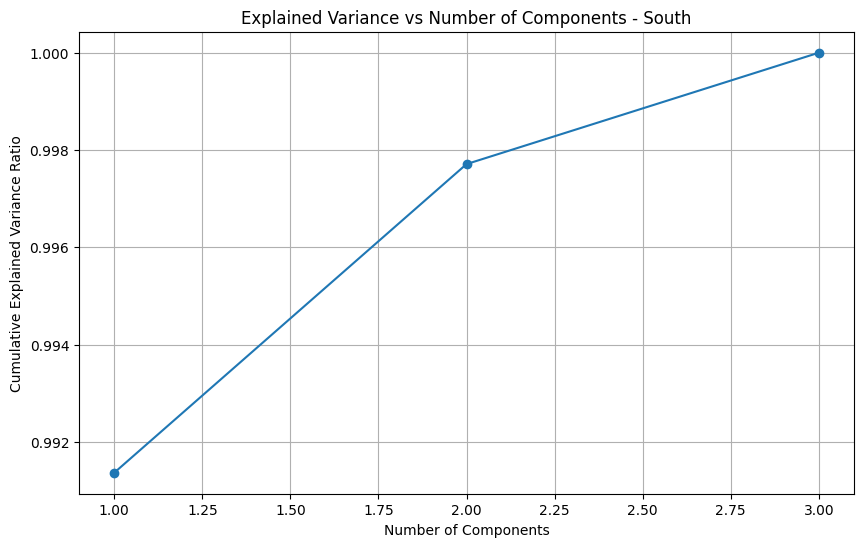

In [25]:
# Create explained variance ratio plot to visualize data (check lecture week 9 - pg 52)

# South
from sklearn.decomposition import PCA

n_components = 3  # Number of principal components to keep
pca = PCA(n_components=n_components)
X_reduced_S_new = pca.fit_transform(X_test_S_new)

explained_variance_ratios = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratios)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_components + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance vs Number of Components - South')
plt.grid()
plt.show()

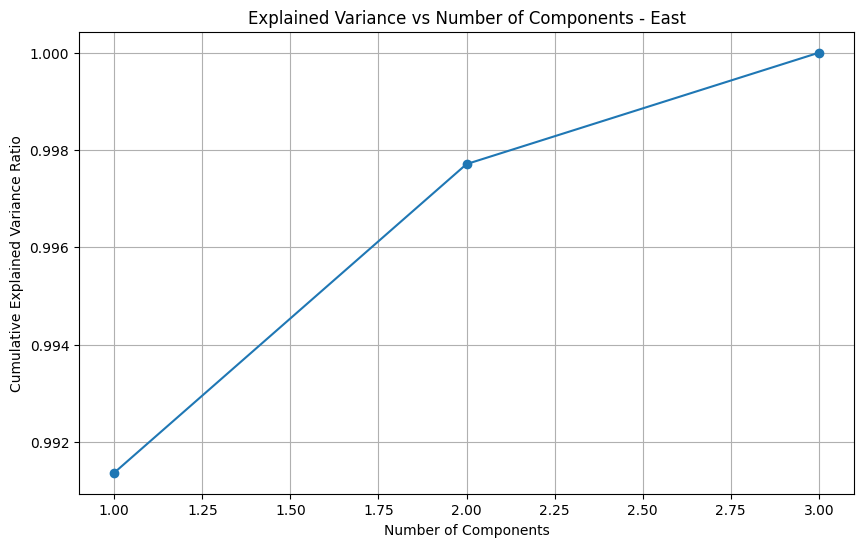

In [26]:
# East
n_components = 3  # Number of principal components to keep
pca = PCA(n_components=n_components)
X_reduced_E_new = pca.fit_transform(X_test_E_new)

explained_variance_ratios = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratios)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_components + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance vs Number of Components - East')
plt.grid()
plt.show()

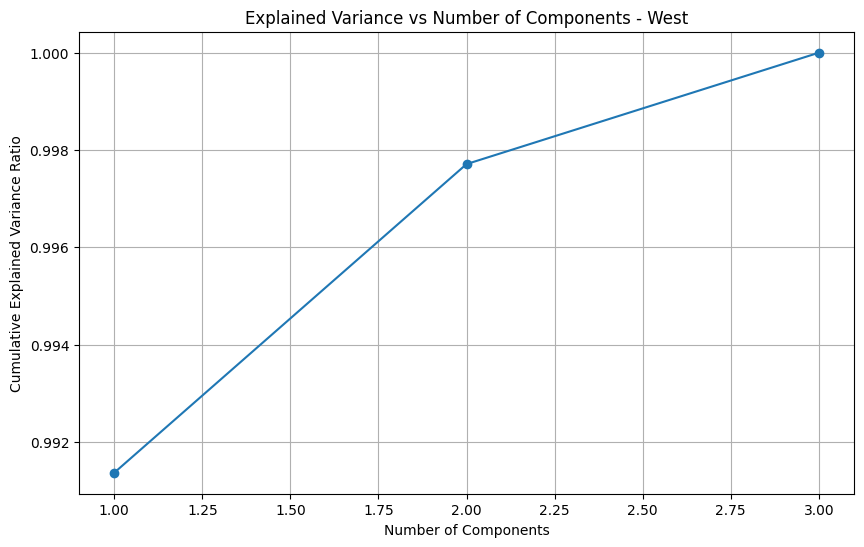

In [27]:
# West
n_components = 3  # Number of principal components to keep
pca = PCA(n_components=n_components)
X_reduced_W_new = pca.fit_transform(X_test_W_new)

explained_variance_ratios = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratios)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_components + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance vs Number of Components - West')
plt.grid()
plt.show()

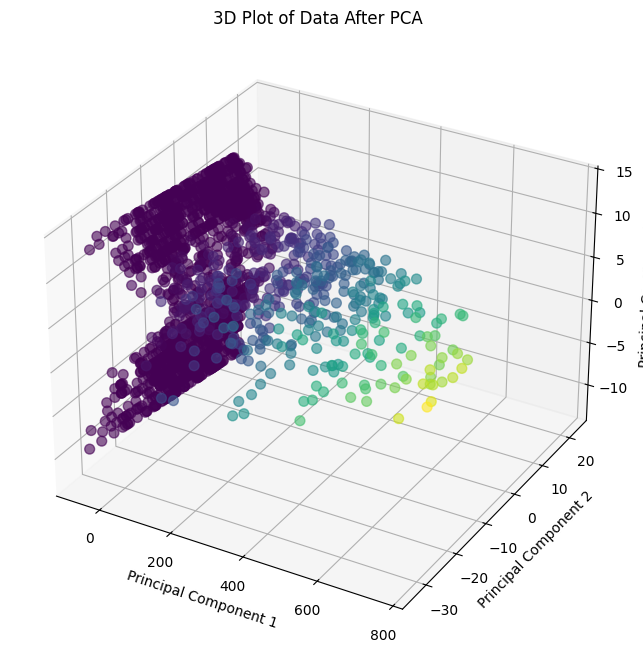

In [28]:
# Projection of 3 principal components
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# 1. Apply PCA
n_components = 3  # Reduce to 3 principal components
pca_new = PCA(n_components=n_components)
X_new_S_reduced = pca_new.fit_transform(X_test_S_new)  # Assuming X_test_S has 5 features

# 2. Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Use the principal components as axes
ax.scatter(X_new_S_reduced[:, 0], X_new_S_reduced[:, 1], X_new_S_reduced[:, 2], c=y_test_S_new, cmap='viridis', s=50, alpha=0.6)

# Set labels (consider labeling with principal component information)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Plot of Data After PCA')

plt.show()

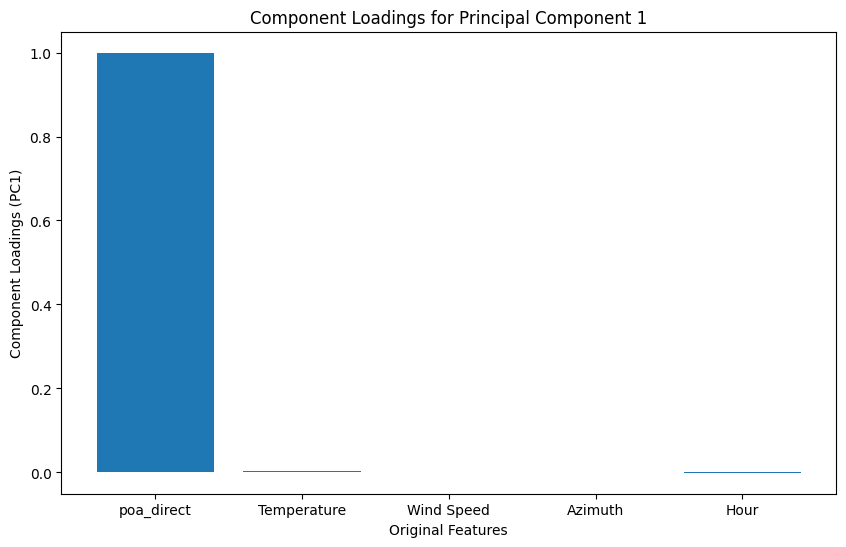

In [29]:
import matplotlib.pyplot as plt

# Create a bar plot of component loadings
plt.figure(figsize=(10, 6))
plt.bar(range(len(pca_new.components_[0])), pca_new.components_[0])  # Plot loadings for PC1
plt.xticks(range(len(pca_new.components_[0])), X_test_S_new.columns) # Set x-axis labels to original feature names
plt.xlabel('Original Features')
plt.ylabel('Component Loadings (PC1)')
plt.title('Component Loadings for Principal Component 1')
plt.show()